In [1]:
import CLibrary as CLib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
X = list(np.random.rand(4,2).flatten())
Y = list(np.random.rand(4,1).flatten())

print(X)
print(Y)

[0.489142573209006, 0.6479630976819627, 0.9220134698624604, 0.44561061718069417, 0.24304428770498854, 0.34131125760145187, 0.8686648886340136, 0.8431357240125347]
[0.6605261401101881, 0.577245320110901, 0.7359005926684397, 0.2534083367146135]


In [4]:
inputCountPerSample = 4
sampleCount = 2
model = CLib.naive_rbf_train(X, Y, inputCountPerSample, sampleCount, 100)
print(CLib.naive_rbf_regression_predict(model, X[:2]))

0.6605261401101882


# Predict simple classification

## High Gamma

In [85]:
X = np.array([
    [0,0],
    [1,1],
    [1,0],
    [0,1],
    [0.5,0.5]
])
Y = np.array([-1,-1,-1,-1,1])
gamma = 100
inputCountPerSample = 5
sampleCount = 2

In [86]:
rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

In [87]:
XToPredict = [[i / 100.0, j / 100.0] for i in range(0,100) for j in range(0, 100)]
predict_array = []
count = 0
for r in XToPredict:
    res = CLib.naive_rbf_classification_predict(rbfModel, XToPredict[count])
    predict_array.append(res)
    count += 1

In [88]:
XToPlotRed = []
XToPlotBlue = []
for i in range(len(predict_array)):
    if predict_array[i] <= 0:
        XToPlotRed.append(XToPredict[i])
    else:
        XToPlotBlue.append(XToPredict[i])
XToPlotRed = np.array(XToPlotRed)
XToPlotBlue = np.array(XToPlotBlue)

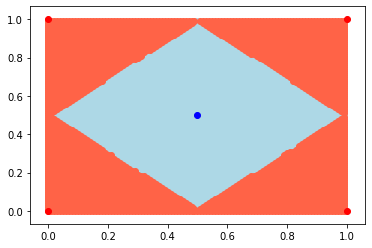

<Figure size 432x288 with 0 Axes>

In [89]:
plt.scatter(XToPlotBlue[:,0],XToPlotBlue[:,1], color='lightblue')
plt.scatter(XToPlotRed[:,0],XToPlotRed[:,1], color='tomato')
plt.scatter(X[4, 1], X[4, 1], color='blue')
plt.scatter(X[0:4,0], X[0:4,1], color='red')
plt.show()
plt.clf()

## Low gamma

In [105]:
X = np.array([
    [0,0],
    [1,1],
    [1,0],
    [0,1],
    [0.5,0.5]
])
Y = np.array([-1,-1,-1,-1,1])
gamma = 1
inputCountPerSample = 5
sampleCount = 2

In [106]:
rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

In [107]:
XToPredict = [[i / 100.0, j / 100.0] for i in range(0,100) for j in range(0, 100)]
predict_array = []
count = 0
for r in XToPredict:
    res = CLib.naive_rbf_classification_predict(rbfModel, XToPredict[count])
    predict_array.append(res)
    count += 1

In [108]:
XToPlotRed = []
XToPlotBlue = []
for i in range(len(predict_array)):
    if predict_array[i] <= 0:
        XToPlotRed.append(XToPredict[i])
    else:
        XToPlotBlue.append(XToPredict[i])
XToPlotRed = np.array(XToPlotRed)
XToPlotBlue = np.array(XToPlotBlue)

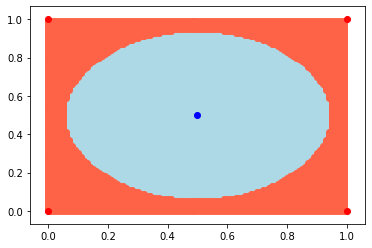

<Figure size 432x288 with 0 Axes>

In [109]:
plt.scatter(XToPlotBlue[:,0],XToPlotBlue[:,1], color='lightblue')
plt.scatter(XToPlotRed[:,0],XToPlotRed[:,1], color='tomato')
plt.scatter(X[4, 1], X[4, 1], color='blue')
plt.scatter(X[0:4,0], X[0:4,1], color='red')
plt.show()
plt.clf()

# Linear Multiple

## High gamma

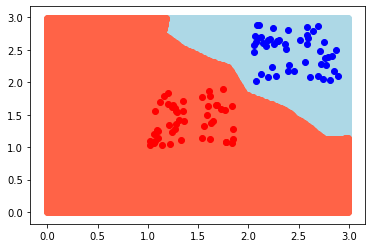

<Figure size 432x288 with 0 Axes>

In [22]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

inputCountPerSample = 100
sampleCount = 2
gamma = 900

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(0, 300) for j in range(0, 300)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

def get(i, l):
    return [z[i] for z in l]

yellow = []
purple = []

for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="lightblue"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="tomato"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

## Low gamma

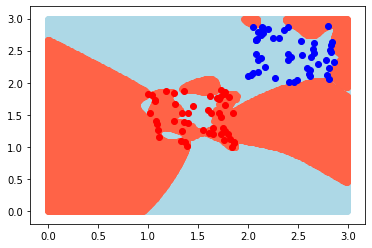

<Figure size 432x288 with 0 Axes>

In [13]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

inputCountPerSample = 100
sampleCount = 2
gamma = 1

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(0, 300) for j in range(0, 300)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

def get(i, l):
    return [z[i] for z in l]

yellow = []
purple = []

for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="lightblue"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="tomato"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

# XOR

## Low gamma

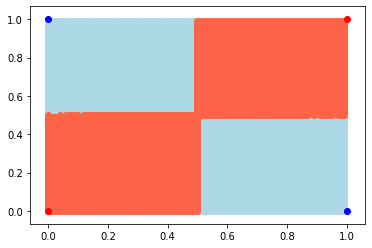

<Figure size 432x288 with 0 Axes>

In [23]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([1, -1, -1, 1])

inputCountPerSample = 4
sampleCount = 2
gamma = 1

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(0, 100) for j in range(0, 100)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="lightblue"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="tomato"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

## High gamma

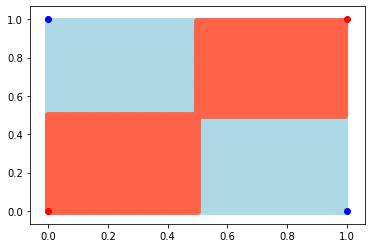

<Figure size 432x288 with 0 Axes>

In [24]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([1, -1, -1, 1])

inputCountPerSample = 4
sampleCount = 2
gamma = 900

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(0, 100) for j in range(0, 100)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="lightblue"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="tomato"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

# Cross

## Medium gamma

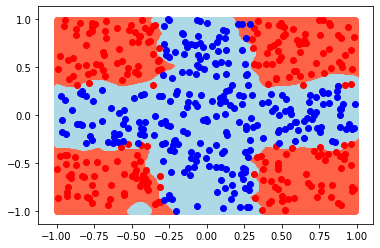

<Figure size 432x288 with 0 Axes>

In [107]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

inputCounterPerSample = 250
sampleCount = 2
gamma = 100

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(-100, 100) for j in range(-100, 100)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="tomato"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="lightblue"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='blue'
)
plt.show()
plt.clf()

## High gamma

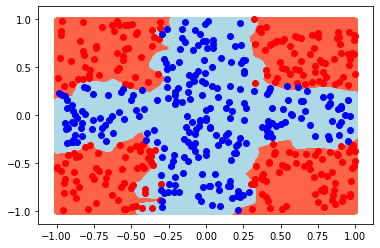

<Figure size 432x288 with 0 Axes>

In [108]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

inputCounterPerSample = 250
sampleCount = 2
gamma = 500

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [[i / 100.0, j / 100.0]for i in range(-100, 100) for j in range(-100, 100)]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if YPredicted[i] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="tomato"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="lightblue"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='blue'
)
plt.show()
plt.clf()

# Multi Class

In [109]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([ [1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [-1, -1, -1] for p in X ])

inputCountPerSample = 250
sampleCount = 2
gamma = 100

rbfModel = CLib.naive_rbf_train(X.flatten(),Y.flatten(),inputCountPerSample,sampleCount,gamma)

XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-150, 150) for j in range(-150, 150)
]
YPredicted = [CLib.naive_rbf_classification_predict(rbfModel, x) for x in XToPredict]



In [112]:
XX = X
YY = Y

[[-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

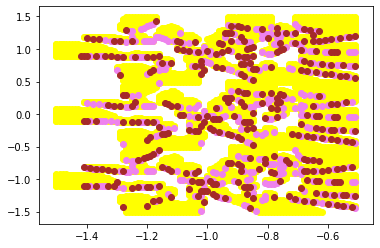

In [120]:
def get(i, l):
    return [z[i] for z in l]

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

res = chunks(YPredicted,3)
YPred2 = res

yellow = []
purple = []
brown = []

print(YPred2[2::])
maxIndex = YPred2[5].index(max(YPred2[5]))
print(maxIndex)

for i, val in enumerate(YPred2):
    if YPred2[i][0] == 1 :
        yellow.append(XToPredict[i])
    elif YPred2[i][1] == 1 :
        brown.append(XToPredict[i])
    elif YPred2[i][2] == 1 :
        purple.append(XToPredict[i])

plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="yellow"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="violet"
)
plt.scatter(
    get(0, brown),
    get(1, brown),
    color="brown"
)

plt.scatter(
    get(0, [x for j, x in enumerate(XX) if YY[j] == [1, -1, -1] ]),
    get(1, [x for j, x in enumerate(XX) if YY[j] == [1, -1, -1] ]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(XX) if YY[j] == [-1, 1, -1] ]),
    get(1, [x for j, x in enumerate(XX) if YY[j] == [-1, 1, -1] ]),
    color='green'
)
plt.scatter(
    get(0, [x for j, x in enumerate(XX) if YY[j] == [-1, -1, 1] ]),
    get(1, [x for j, x in enumerate(XX) if YY[j] == [-1, -1, 1] ]),
    color='blue'
)
plt.show()
plt.clf()

### 